# Logistic Regression - BIMBO dataset

### El presente proyecto tratará de resolver la problemática que se tiene en la planta Santa María de la empresa BIMBO, particularmente en el departamento de transportes, a través de una base de datos creada para enfrentar el escaso regreso de operadores de los centros de venta con equipo para abastecer las líneas de producción.

#### Se cargan las librerías a emplear en todo el proyecto

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(8,8)})

#### Cargamos la base de datos

In [65]:
df = pd.read_csv("/content/operadores_regresos_final.csv",encoding="Latin")

## Análisis Exploratorio de Datos

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             877 non-null    object 
 1   Centro de ventas  902 non-null    object 
 2   Operador          913 non-null    object 
 3   Llamada           915 non-null    object 
 4   Arribo a BMS      913 non-null    object 
 5   No. Remolques     914 non-null    float64
 6   Observaciones     5 non-null      object 
dtypes: float64(1), object(6)
memory usage: 50.2+ KB


In [67]:
df.describe(include="all")

,Fecha,Centro de ventas,Operador,Llamada,Arribo a BMS,No. Remolques,Observaciones
count,877,902,913,915,913,914.000000,5
unique,58,43,129,8,3,NaN,5
top,18/11/2021,iztapalapa,Victor Malaga,si,si,NaN,globo
freq,29,159,49,547,585,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,0.853392,NaN
std,NaN,NaN,NaN,NaN,NaN,0.726855,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [68]:
df.head()

,Fecha,Centro de ventas,Operador,Llamada,Arribo a BMS,No. Remolques,Observaciones
0,NaN,san antonio,Victor Malaga,no,si,1.0,NaN
1,NaN,san antonio,Julio Gaona,no,si,1.0,NaN
2,NaN,iztapalapa,Jorge Casarez,si,si,2.0,NaN
3,NaN,rojo gomez,Gino Quintana,no,no,0.0,NaN
4,NaN,naucalpan,Hector Aguirre,si,si,1.0,NaN


In [69]:
df.tail()

,Fecha,Centro de ventas,Operador,Llamada,Arribo a BMS,No. Remolques,Observaciones
910,19/01/2022,centenario,Francisco Cortez,si,si,1.0,NaN
911,23/01/2022,chalco,hernandez tellez,no,no,0.0,NaN
912,23/01/2022,reyes,Marco Abad,no,no,0.0,NaN
913,23/01/2022,tepalcates,jose guadalupe sosa,no,no,0.0,NaN
914,23/01/2022,san antonio,Rodrigo Barrera,si,si,1.0,NaN


#### Elegimos las variables con las que realizaremos la regresión lógistica

In [70]:
columns = ["Operador","Centro de ventas","Llamada","Arribo a BMS"]
dff = df.filter(columns)

In [71]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Operador          913 non-null    object
 1   Centro de ventas  902 non-null    object
 2   Llamada           915 non-null    object
 3   Arribo a BMS      913 non-null    object
dtypes: object(4)
memory usage: 28.7+ KB


In [72]:
dff.describe(include="all")

,Operador,Centro de ventas,Llamada,Arribo a BMS
count,913,902,915,913
unique,129,43,8,3
top,Victor Malaga,iztapalapa,si,si
freq,49,159,547,585


#### Borramos las observaciones con valores nulos

In [73]:
dff = dff.dropna(axis=0)

In [74]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 914
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Operador          898 non-null    object
 1   Centro de ventas  898 non-null    object
 2   Llamada           898 non-null    object
 3   Arribo a BMS      898 non-null    object
dtypes: object(4)
memory usage: 35.1+ KB


In [75]:
dff.head()

,Operador,Centro de ventas,Llamada,Arribo a BMS
0,Victor Malaga,san antonio,no,si
1,Julio Gaona,san antonio,no,si
2,Jorge Casarez,iztapalapa,si,si
3,Gino Quintana,rojo gomez,no,no
4,Hector Aguirre,naucalpan,si,si


In [76]:
dff.tail()

,Operador,Centro de ventas,Llamada,Arribo a BMS
910,Francisco Cortez,centenario,si,si
911,hernandez tellez,chalco,no,no
912,Marco Abad,reyes,no,no
913,jose guadalupe sosa,tepalcates,no,no
914,Rodrigo Barrera,san antonio,si,si


## Limpieza de Datos

#### Convertimos todas las observaciones a letras minúsculas

In [77]:
dff["Operador"] = dff["Operador"].str.lower()

In [78]:
dff["Centro de ventas"] = dff["Centro de ventas"].str.lower()

In [79]:
dff["Llamada"] = dff["Llamada"].str.lower()

In [80]:
dff["Arribo a BMS"] = dff["Arribo a BMS"].str.lower()

### Operador

#### Revisamos los valores únicos

In [81]:
dff["Operador"].unique()

array(['victor malaga', 'julio gaona', 'jorge casarez', 'gino quintana',
       'hector aguirre', 'javier gonzalez', 'sergio lozada', 'jose sosa',
       'armando arcos', 'oscar luna', 'alfredo vega', 'jorge cazarez',
       'alfonso mendoza', 'gerardo perez', 'oscar aldama',
       'jorge marquez', 'joaquin gallardo', 'jorge hernandez franco',
       'ivan luna', 'alejandro aranda', 'abraham ponce', 'jorge solano',
       'lucas sanchez', 'lucas erasto', 'jesus caballero',
       'rodolfo martinez', 'alfonzo mendoza', 'rodrigo barrera',
       'vicente de la cruz', 'jorge hernandez', 'gonzalo campos',
       'alejandro hernandez', 'armando', 'victo malaga',
       'oscar hernandez', 'angel hernandez', 'josé sosa',
       'israel carbajal', 'tolentino jacome', 'jorge rodrigo',
       'jorge toledo', 'cesar mendoza', 'raymundo mora', 'marco abad',
       'francisco cortez', 'amando arcos', 'alfreo vega', 'jorge cazares',
       'jorge hernández tellez', 'jorge hernández franco',
       

In [82]:
len(dff["Operador"].unique())

99

#### Despúes de revisar los valores únicos, debemos hacer varias correciones a los nombres, dado que algunos nombres no están registrados correctamente

In [83]:
dff.loc[dff["Operador"] == "victo malaga","Operador"] = "victor malaga"
dff.loc[dff["Operador"] == "jorge cazares","Operador"] = "jorge casarez"
dff.loc[dff["Operador"] == "jorge cazarez","Operador"] = "jorge casarez"
dff.loc[dff["Operador"] == "ivan luna","Operador"] = "ivan cadena"
dff.loc[dff["Operador"] == "lucas erasto","Operador"] = "lucas sanchez"
dff.loc[dff["Operador"] == "alfonzo mendoza","Operador"] = "alfonso mendoza"
dff.loc[dff["Operador"] == " abraham ponce","Operador"] = "abraham ponce"
dff.loc[dff["Operador"] == "josé sosa","Operador"] = "jose sosa"
dff.loc[dff["Operador"] == "jose guadalupe sosa","Operador"] = "jose sosa"
dff.loc[dff["Operador"] == "oscar hernandez","Operador"] = "jorge hernandez franco"
dff.loc[dff["Operador"] == "jorge hernández franco","Operador"] = "jorge hernandez franco"
dff.loc[dff["Operador"] == "armando","Operador"] = "armando arcos"
dff.loc[dff["Operador"] == "amando arcos","Operador"] = "armando arcos"
dff.loc[dff["Operador"] == "alfreo vega","Operador"] = "alfredo vega"
dff.loc[dff["Operador"] == "j.felix sanchez","Operador"] = "felix sanchez"
dff.loc[dff["Operador"] == "angel hernandez","Operador"] = "giovanni hernandez"
dff.loc[dff["Operador"] == "hernandez tellez","Operador"] = "jorge hernandez tellez"
dff.loc[dff["Operador"] == "jorge hernandez","Operador"] = "jorge hernandez tellez"
dff.loc[dff["Operador"] == "jorge rodrigo","Operador"] = "jorge hernandez tellez"
dff.loc[dff["Operador"] == "jorge hernández tellez","Operador"] = "jorge hernandez tellez"
dff.loc[dff["Operador"] == "sergio arzate","Operador"] = "sergio garcia arzate"
dff.loc[dff["Operador"] == "sergio garcia","Operador"] = "sergio garcia arzate"
dff.loc[dff["Operador"] == "jorge toledo","Operador"] = "jorge martinez toledo"
dff.loc[dff["Operador"] == "jorge martinez","Operador"] = "jorge martinez toledo"
dff.loc[dff["Operador"] == "jorge martinez ","Operador"] = "jorge martinez toledo"
dff.loc[dff["Operador"] == "tolentino jacome","Operador"] = "librado tolentino"
dff.loc[dff["Operador"] == "luis salas","Operador"] = "martin salas"
dff.loc[dff["Operador"] == "jose aguilar","Operador"] = "julio lopez"
dff.loc[dff["Operador"] == "jesus aguilar","Operador"] = "julio lopez"
dff.loc[dff["Operador"] == "luis salas","Operador"] = "martin salas"
dff.loc[dff["Operador"] == "israel carbajal","Operador"] = "felipe carbajal"
dff.loc[dff["Operador"] == "angel ortega","Operador"] = "luis gonzalez"
dff.loc[dff["Operador"] == "francisco cortez","Operador"] = "francisco cortes"

In [84]:
dff["Operador"].unique()

array(['victor malaga', 'julio gaona', 'jorge casarez', 'gino quintana',
       'hector aguirre', 'javier gonzalez', 'sergio lozada', 'jose sosa',
       'armando arcos', 'oscar luna', 'alfredo vega', 'alfonso mendoza',
       'gerardo perez', 'oscar aldama', 'jorge marquez',
       'joaquin gallardo', 'jorge hernandez franco', 'ivan cadena',
       'alejandro aranda', 'abraham ponce', 'jorge solano',
       'lucas sanchez', 'jesus caballero', 'rodolfo martinez',
       'rodrigo barrera', 'vicente de la cruz', 'jorge hernandez tellez',
       'gonzalo campos', 'alejandro hernandez', 'giovanni hernandez',
       'felipe carbajal', 'librado tolentino', 'jorge martinez toledo',
       'cesar mendoza', 'raymundo mora', 'marco abad', 'francisco cortes',
       'felix sanchez', 'abad eduardo del angel', 'luis gonzalez',
       'marco nolasco', 'saul maldonado', 'hugo moreno', 'aaron flores',
       'sergio garcia arzate', 'adan gonzalez', 'omar ortiz',
       'roberto carlos', 'victoriano ga

In [85]:
len(dff["Operador"].unique())

69

#### Al final se tienen a 69 operadores

In [86]:
sorted(list(set(dff.Operador.unique())))

['aaron flores',
 'abad eduardo del angel',
 'abraham ponce',
 'adan gonzalez',
 'adolfo marquina',
 'alejandro aranda',
 'alejandro hernandez',
 'alejandro xochitiotzi',
 'alfonso mendoza',
 'alfredo vega',
 'armando arcos',
 'benito villasana',
 'cesar mendoza',
 'felipe carbajal',
 'felipe espinoza',
 'felipe rivera',
 'felix aguilar',
 'felix sanchez',
 'francisco cortes',
 'gaston soto',
 'gerardo perez',
 'gino quintana',
 'giovanni hernandez',
 'gonzalo campos',
 'hector aguirre',
 'hugo moreno',
 'ivan cadena',
 'javier gonzalez',
 'jesus caballero',
 'joaquin gallardo',
 'jorge casarez',
 'jorge hernandez franco',
 'jorge hernandez tellez',
 'jorge marquez',
 'jorge martinez toledo',
 'jorge ortiz',
 'jorge solano',
 'jose luis badillo',
 'jose sosa',
 'juan cortes lopez',
 'juan perez fuentes',
 'julio gaona',
 'julio lopez',
 'librado tolentino',
 'lucas sanchez',
 'luis gonzalez',
 'marco abad',
 'marco nolasco',
 'mario antonio diaz',
 'martin salas',
 'moises carrillo',
 

#### Si deseamos ver los destinos de un operador en específico, empleamos el siguiente código

In [87]:
an = dff[["Operador"]].apply(
    lambda x: x.str.contains(
        "victor malaga",
        regex=True
    )
).any(axis=1)
print(dff[an])

          Operador Centro de ventas Llamada Arribo a BMS
0    victor malaga      san antonio      no           si
11   victor malaga         la villa      no           si
30   victor malaga       iztapalapa      sí           sí
38   victor malaga      tepalcates       si           si
52   victor malaga       tepalcates      si           si
61   victor malaga       iztapalapa      si           si
67   victor malaga     santa clara       si           si
82   victor malaga       iztapalapa      si           si
98   victor malaga       iztapalapa      si           si
102  victor malaga       iztapalapa      si           si
116  victor malaga        naucalpan      si           si
136  victor malaga       iztapalapa      si           si
152  victor malaga       iztapalapa      si           si
153  victor malaga       iztapalapa      si           si
181  victor malaga       iztapalapa      si           si
192  victor malaga         xalostoc      si           no
201  victor malaga         coac

### Centro de Ventas

#### Revisamos los valores únicos

In [88]:
dff["Centro de ventas"].unique()

array(['san antonio', 'iztapalapa', 'rojo gomez', 'naucalpan',
       'tultitlan', 'santa clara', 'san antonio ', 'la villa',
       'tepalcates', 'coacalco', 'san lorenzo', 'centro', 'chalco ',
       'centenario', 'san juan', 'xalostoc', 'tepalcates ', 'chalco',
       'azcapopark', 'ceylan', 'atizapan', 'santa clara ', 'xochimilco',
       'ceylan-tultitlan', 'tepotzotlan', 'cedis iztapala', 'reyes',
       'san juan ', 'centenario ', 'la villa ', 'vallejo', 'los reyes',
       'ixtapaluca', 'chalco-san juan', 'villa', 'cuautitlan',
       'san antonio  ', 'san atonio', 'cdm'], dtype=object)

In [89]:
len(dff["Centro de ventas"].unique())

39

#### Al igual que en el caso de los operadores, debemos realizar correciones en las observaciones

In [90]:
dff.loc[dff["Centro de ventas"] == "san antonio ","Centro de ventas"] = "san antonio"
dff.loc[dff["Centro de ventas"] == "chalco ","Centro de ventas"] = "chalco"
dff.loc[dff["Centro de ventas"] == "ceylan-tultitlan","Centro de ventas"] = "ceylan"
dff.loc[dff["Centro de ventas"] == "iztapalapa","Centro de ventas"] = "cedis iztapalapa"
dff.loc[dff["Centro de ventas"] == "reyes","Centro de ventas"] = "los reyes"
dff.loc[dff["Centro de ventas"] == "chalco-san juan","Centro de ventas"] = "chalco"
dff.loc[dff["Centro de ventas"] == "villa","Centro de ventas"] = "la villa"
dff.loc[dff["Centro de ventas"] == "san antonio  ","Centro de ventas"] = "san antonio"
dff.loc[dff["Centro de ventas"] == "san atonio","Centro de ventas"] = "san antonio"
dff.loc[dff["Centro de ventas"] == "cedis iztapala","Centro de ventas"] = "cedis iztapalapa"
dff.loc[dff["Centro de ventas"] == "centenario ","Centro de ventas"] = "centenario"
dff.loc[dff["Centro de ventas"] == "la villa ","Centro de ventas"] = "la villa"
dff.loc[dff["Centro de ventas"] == "santa clara ","Centro de ventas"] = "santa clara"
dff.loc[dff["Centro de ventas"] == "san juan ","Centro de ventas"] = "san juan"
dff.loc[dff["Centro de ventas"] == "tepalcates ","Centro de ventas"] = "tepalcates"

In [91]:
dff["Centro de ventas"].unique()

array(['san antonio', 'cedis iztapalapa', 'rojo gomez', 'naucalpan',
       'tultitlan', 'santa clara', 'la villa', 'tepalcates', 'coacalco',
       'san lorenzo', 'centro', 'chalco', 'centenario', 'san juan',
       'xalostoc', 'azcapopark', 'ceylan', 'atizapan', 'xochimilco',
       'tepotzotlan', 'los reyes', 'vallejo', 'ixtapaluca', 'cuautitlan',
       'cdm'], dtype=object)

In [92]:
len(dff["Centro de ventas"].unique())

25

#### Se cuenta con 25 Centros de venta al final de las correciones

In [93]:
sorted(list(set(dff["Centro de ventas"].unique())))

['atizapan',
 'azcapopark',
 'cdm',
 'cedis iztapalapa',
 'centenario',
 'centro',
 'ceylan',
 'chalco',
 'coacalco',
 'cuautitlan',
 'ixtapaluca',
 'la villa',
 'los reyes',
 'naucalpan',
 'rojo gomez',
 'san antonio',
 'san juan',
 'san lorenzo',
 'santa clara',
 'tepalcates',
 'tepotzotlan',
 'tultitlan',
 'vallejo',
 'xalostoc',
 'xochimilco']

### Llamada

#### Revisamos los valores únicos

In [94]:
dff["Llamada"].unique()

array(['no', 'si', 'sí', 'no contestó', 'colgó', 'p', ' no contestó'],
      dtype=object)

#### Revisamos las observaciones con la categoria "p"

In [95]:
dff.query('Llamada == "p"')

,Operador,Centro de ventas,Llamada,Arribo a BMS
674,raymundo mora,san juan,p,no
706,marco abad,san antonio,p,no
709,gerardo perez,naucalpan,p,no
902,alejandro hernandez,ixtapaluca,p,no
908,abraham ponce,xochimilco,p,no


#### Se hacen las correciones pertinentes y en particular las observaciones con la categoría "p" se cambian a la categoría "no", ya que la llamada nunca se realizó

In [96]:
dff.loc[dff["Llamada"] == "p","Llamada"] = "no"
dff.loc[dff["Llamada"] == "sí","Llamada"] = "si"
dff.loc[dff["Llamada"] == " no contestó","Llamada"] = "no contesto"
dff.loc[dff["Llamada"] == "no contestó","Llamada"] = "no contesto"

In [97]:
dff["Llamada"].unique()

array(['no', 'si', 'no contesto', 'colgó'], dtype=object)

### Arribo a BMS

#### Se sigue el mismo tratamiento que las variables anteriores

In [98]:
dff["Arribo a BMS"].unique()

array(['si', 'no', 'sí'], dtype=object)

In [99]:
dff.loc[dff["Arribo a BMS"] == "sí","Arribo a BMS"] = "si"

In [100]:
dff["Arribo a BMS"].unique()

array(['si', 'no'], dtype=object)

## Análisis de Datos

#### 585 o el 65% de operadores si pasaron a la planta BMS a dejar remolque con equipo, y 313 o el 35% de operadores no pasaron a la planta 

In [101]:
dff["Arribo a BMS"].value_counts()

si    585
no    313
Name: Arribo a BMS, dtype: int64

In [102]:
dff["Arribo a BMS"].value_counts()/len(dff["Arribo a BMS"])

si    0.651448
no    0.348552
Name: Arribo a BMS, dtype: float64

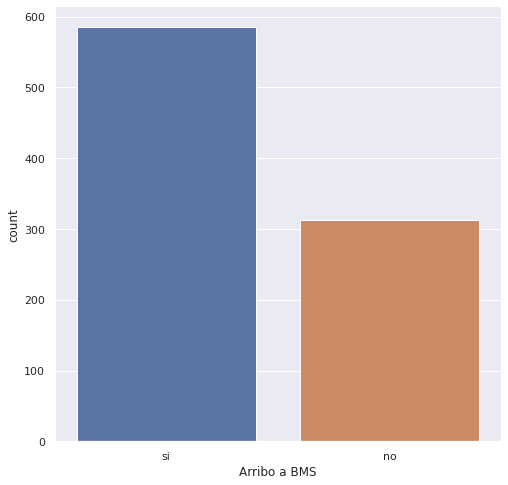

In [126]:
sns.countplot(x="Arribo a BMS", data=dff);

#### 547 operadores respondieron la llamada, no se les llamó a 302 operadores, 48 de ellos no contestaron y sólo uno de ellos colgó la llamada

In [104]:
dff["Llamada"].value_counts()

si             547
no             302
no contesto     48
colgó            1
Name: Llamada, dtype: int64

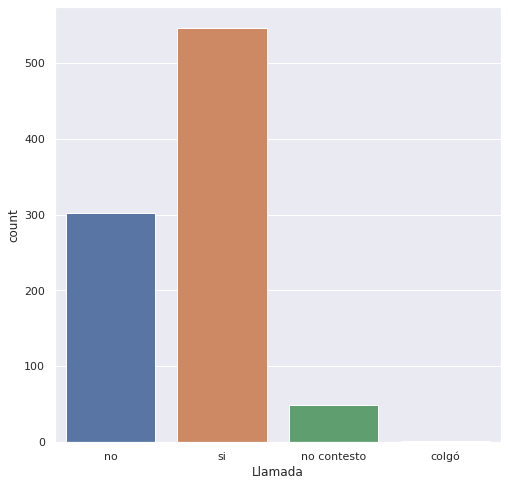

In [127]:
sns.countplot(x="Llamada", data=dff);

#### Se observan algunos detalles interesantes de la tabla posterior:
- El operador que colgó la llamada sí pasó a la planta BMS
- La mayoría de los operadores que no contestan la llamada, no pasan a la planta BMS
- 76 operadores respondieron la llamada, sin embargo, no pasaron a la planta BMS
- A 104 operadores no se les llamó, sin embargo, pasaron a la planta BMS, quienes representaron aproximadamente el 18% del total de operadores que pasaron a la planta BMS

In [106]:
pd.crosstab(dff["Arribo a BMS"],dff["Llamada"])

Llamada,colgó,no,no contesto,si
Arribo a BMS,,,,
no,0,198,39,76
si,1,104,9,471


#### En la siguiente tabla podemos ver el comportamiento de cada operador con relación a la variable "Llamada"

In [107]:
pd.set_option('display.max_rows', None)
pd.crosstab(dff["Operador"],dff["Llamada"])

Llamada,colgó,no,no contesto,si
Operador,,,,
aaron flores,0,6,2,2
abad eduardo del angel,0,6,0,6
abraham ponce,0,11,1,16
adan gonzalez,0,6,0,0
adolfo marquina,0,0,0,6
alejandro aranda,0,3,0,25
alejandro hernandez,0,5,1,3
alejandro xochitiotzi,0,1,1,5
alfonso mendoza,0,6,0,16


#### En la tabla siguiente podemos observar por operador el total de regresos a la planta BMS

In [108]:
pd.crosstab(dff["Operador"],dff["Arribo a BMS"])

Arribo a BMS,no,si
Operador,,
aaron flores,8,2
abad eduardo del angel,5,7
abraham ponce,15,13
adan gonzalez,5,1
adolfo marquina,1,5
alejandro aranda,2,26
alejandro hernandez,3,6
alejandro xochitiotzi,3,4
alfonso mendoza,4,18


#### En la siguiente tabla se puede observar por Centro de venta cuantos regresos a la planta BMS se realizaron

In [109]:
pd.crosstab(dff["Centro de ventas"],dff["Arribo a BMS"])

Arribo a BMS,no,si
Centro de ventas,,
atizapan,2,4
azcapopark,0,6
cdm,0,3
cedis iztapalapa,35,125
centenario,10,25
centro,1,4
ceylan,0,3
chalco,36,20
coacalco,3,3


#### En la última tabla se puede observar en que Centro de venta se encontraba el operador al momento de realizar la llamada telefónica

In [110]:
pd.crosstab(dff["Centro de ventas"],dff["Llamada"])

Llamada,colgó,no,no contesto,si
Centro de ventas,,,,
atizapan,0,1,0,5
azcapopark,0,1,0,5
cdm,0,2,0,1
cedis iztapalapa,0,33,4,123
centenario,0,18,3,14
centro,0,3,1,1
ceylan,0,0,0,3
chalco,1,28,9,18
coacalco,0,2,1,3


In [111]:
#pip install dython

## Correlación de variables categóricas

In [112]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(dff)
categorical_features

['Operador', 'Centro de ventas', 'Llamada', 'Arribo a BMS']

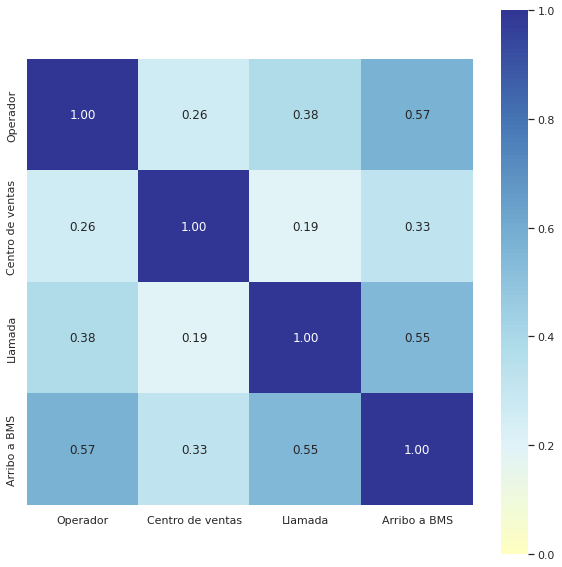

In [128]:
categorical_correlation= associations(dff, filename= 'categorical_correlation.png', figsize=(10,10),cmap="RdYlBu")

#### De la matriz de correlación se observa que la variable "Operador" tiene el valor más alto de correlación con la variable "Arribo a BMS", seguida de la variable "Llamada", siendo la variable "Centro de ventas" la menos correlacionada

## Modelo Logistic Regression

#### En nuestro modelo de regresión logística, la variable que vamos a predecir es "Arribo a BMS", puesto que nos importa predecir que operadores van o no a regresar a la planta BMS a dejar remolques con equipo para las líneas de producción

#### Dividimos nuestro dataset en target y data para poder emplear el modelo

In [117]:
target_name = "Arribo a BMS"
target = dff[target_name]
data = dff.drop(columns=[target_name])

#### Se usará un selector de variables categóricas y se crearán dummy-variables

In [118]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([('one-hot-encoder', categorical_preprocessor, categorical_columns)])

#### Creamos un pipeline con el modelo y el preprocesador

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Operador',
                                                   'Centro de ventas',
                                                   'Llamada'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

#### Aplicamos el método de la exclusión a nuestros datasets

In [120]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.20, random_state = 42)

#### Ajustamos el modelo

In [121]:
_ = model.fit(Xtrain, ytrain)

#### Predecimos con el modelo en el test dataset

In [122]:
y_pred = model.predict(Xtest)

#### Revisamos el porcentaje de observaciones por categoría que se tienen en el dataset de entrenamiento, para verificar si nuestro dataset está desbalanceado

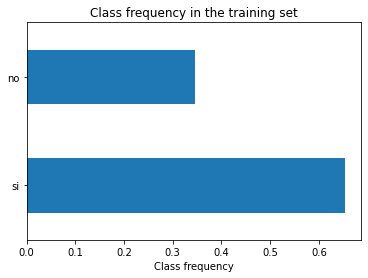

In [ ]:
ytrain.value_counts(normalize=True).plot.barh()
plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

#### Revisamos la matriz de confusión y la graficamos

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred)

array([[ 48,  17],
       [ 11, 104]])

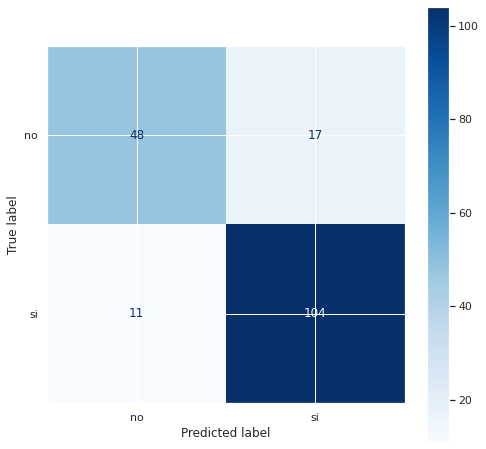

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(model, Xtest, ytest,cmap="Blues")

#### Observamos que el modelo predijo 104 observaciones de la categoría "si" correctamente, 48 correctamente de la categoría "no", ha clasificado erroneamente 11 observaciones de la categoría "si" y 17 observaciones de la categoría "no"

#### Revisamos las métricas de evaluación del modelo

In [136]:
from sklearn.metrics import accuracy_score
print (f"Accuracy: {round(accuracy_score(ytest, y_pred),3)}")

Accuracy: 0.844


#### El valor de Accuracy ha sido bueno,sin embargo, no podemos confiar del todo en él, ya que nuestro dataset está desbalanceado, por lo que usaremos otra métrica para estos casos

In [137]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(ytest, y_pred)
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.821


#### El valor obtenido no difiere mucho del Accuracy anterior, este valor nos indica que el modelo ha predecido el 82.1% de las observaciones positivas correctamente

#### Ahora calcularemos otras métricas que son importantes para evaluar nuestro modelo

In [138]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(ytest, y_pred, pos_label="si")
recall = recall_score(ytest, y_pred, pos_label="si")
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Precision score: 0.860
Recall score: 0.904


- El valor de Precision nos indica el porcentaje total de los operadores que el modelo predice que pasarán a la planta
- El valor de Recall nos indica el porcentaje de los operadores que el modelo ha predecido que han pasado a la planta del total de operadores que verdaderamente lo hicieron
#### El porcentaje de ambas métricas es más alto que del Accuracy, lo que nos indica que es un buen modelo

## Gráficos de las métricas

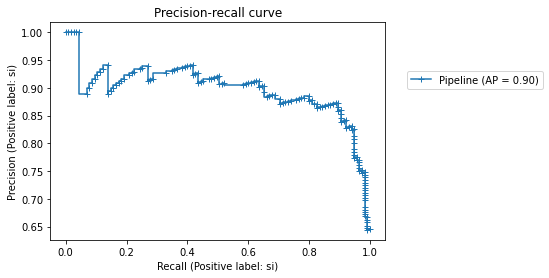

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    model, Xtest, ytest, pos_label='si',
    marker="+"
)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

#### En el gráfico se muestran ambas métricas contrastadas, como también se muestra el Average-Precision (AP).

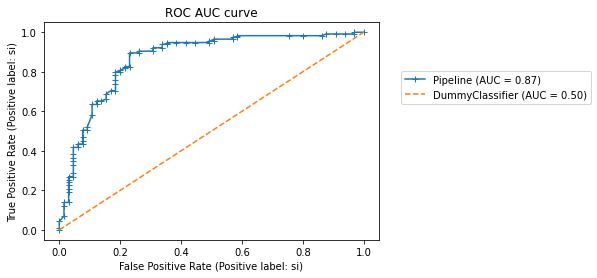

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(Xtrain, ytrain)

disp = RocCurveDisplay.from_estimator(
    model, Xtest, ytest, pos_label='si',
    marker="+")
disp = RocCurveDisplay.from_estimator(
    dummy_classifier, Xtest, ytest, pos_label='si',
    color="tab:orange", linestyle="--", ax=disp.ax_)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("ROC AUC curve")

#### La ROC-AUC es un gráfico que nos ayuda a determinar que tan bueno es nuestro modelo al contrastarlo con un clasificador dummy, vemos que el valor de el área bajo la curva (AUC) es de 0.87, para poder decir que es un modelo deficiente, la curva debería estar por debajo de la línea punteada.

#### Finalmente, probamos el modelo con un operador

In [ ]:
operador_prueba = pd.DataFrame(
    {
        "Operador": ["librado tolentino"],
        "Centro de ventas": ["los reyes"],
        "Llamada": ["si"]
    }
)

#### El modelo predice que el operador no pasara a la planta Santa María a dejar el remolque con equipo para las líneas de producción

In [ ]:
operador_prueba.head()
model.predict(operador_prueba)

array(['no'], dtype=object)